In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [33]:
def get_path(spin, res):
    return f'img_dump/SPO/SgrA/a{spin}_i30_f230.e9/nn{res}.h5'

def colorbar(mappable):
    """ the way matplotlib colorbar should have been implemented """
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    return fig.colorbar(mappable, cax=cax)

def readimg(fname, **kwargs):
    # Return intensity from path of a snapshot
    hfp = h5py.File(fname,'r')
    imagep = np.copy(hfp['pol']).transpose((1,0,2))
    I = imagep[:,:,0]
    scale = hfp['header']['scale'][()]
    return I, scale

def downsampling(array, i):
    # Downsample the 2d array by choosing every ith pixel only
    return array[0::i,0::i]

def get_total_I(I, scale, avg=False):
    if avg:
        return np.average(I)
    else:
        return I.sum()*scale

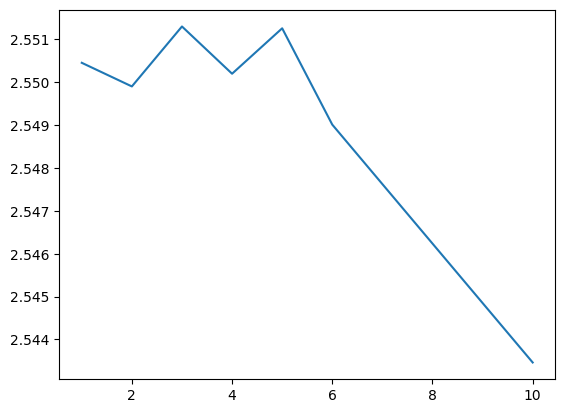

In [ ]:
tmp1, tmp2 = [], []
downsample_i = [1, 2, 3, 4, 5, 6, 10]

path = get_path('+0.94', '1500')
I, scale = readimg(path)
for i in downsample_i:
    I_downsampled = downsampling(I, i)
    tmp1.append(get_total_I(I_downsampled, scale * (i ** 2)))
plt.plot(downsample_i, tmp1)

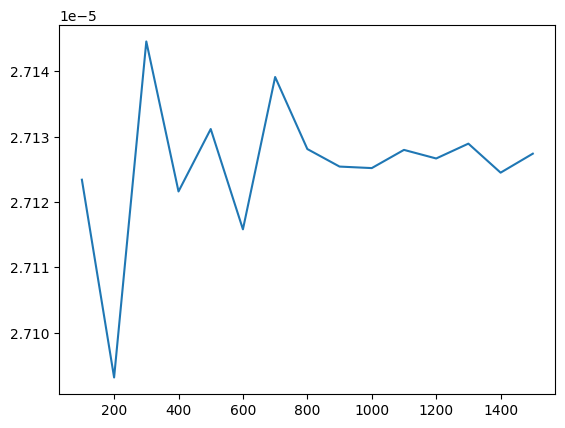

In [30]:
tmp = []
res = np.linspace(100, 1500, 15)
for nn in res:
    path = get_path('+0.94', nn.astype(int))
    I, scale = readimg(path)
    tmp.append(get_total_I(I, scale))

plt.plot(res, tmp)